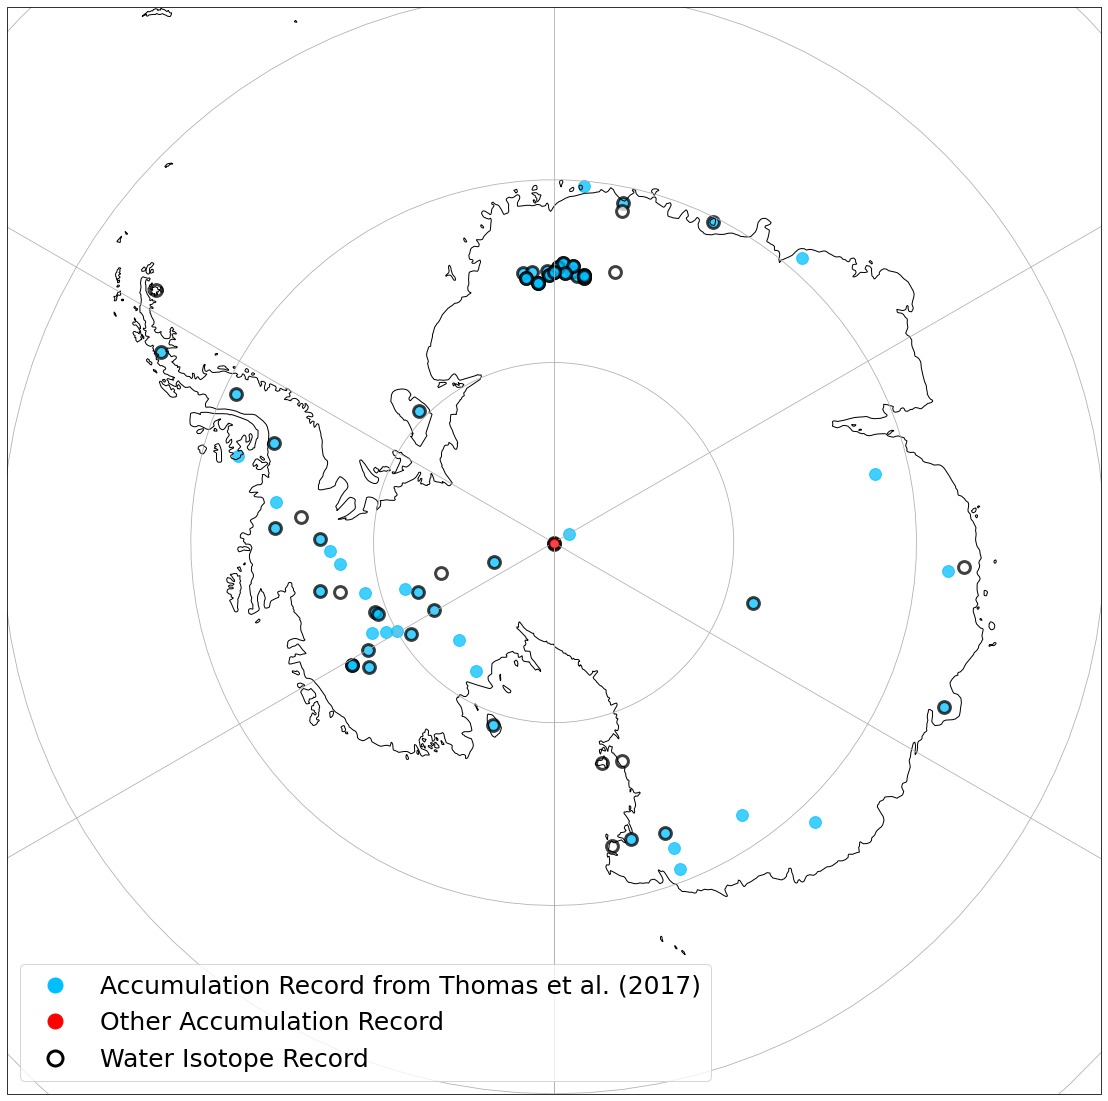

In [43]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd

def tempPlot(): 
    prox = np.load('assimilated_proxies.npy', allow_pickle=True)
    #aProx = np.load('nonassimilated_proxies.npy', allow_pickle=True)
    #print(prox)
    
    proxLats = np.zeros(2247)
    proxLons = np.zeros(2247)
    
    proxArr = np.array(pd.read_csv('proxyCoords.csv'))
    redLats = np.zeros(2247)
    redLons = np.zeros(2247)
    
    
    for p in proxArr:
        redLats = p[0]
        redLons = p[1]
            

    i = 0
    for p in prox:
        for q in p:
            proxLats[i] = p[q][1]
            proxLons[i] = p[q][2]
        i = i + 1
        
    for i in range(len(proxLats)):
        #print(proxLats[i])
        if proxLats[i] == -90.0:
            proxLats[i] = 90.0
        elif proxLats[i] == -70.25:
            proxLats[i] = 90.0
        elif proxLats[i] == -76.95:
            proxLats[i] = 90.0
        elif proxLats[i] == -77.96:
            proxLats[i] = 90.0
        elif proxLats[i] == -76.77:
            proxLats[i] = 90.0
            
    
    ax = plt.axes(projection=ccrs.SouthPolarStereo())

    
    ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax.gridlines()
    
    plt.rcParams['figure.figsize'] = [20, 20]

    
    
    
    
    #plt.scatter(proxLons, proxLats, s=70, c='blue', edgecolor='blue', alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
    #plt.scatter([0.0, 26.34, -121.22, -95.96, -101.74], [-90.0, -70.25, -76.95, -77.96, -76.77], s=70, c='red', edgecolor='black', linewidth=5, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
    
    plt.scatter(proxArr[:, 3], proxArr[:, 2], s=140, c='deepskyblue', edgecolor='black', linewidth=3, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
    plt.scatter(proxArr[:, 7], proxArr[:, 6], s=140, c='deepskyblue', edgecolor='deepskyblue', linewidth=1, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
    plt.scatter(proxArr[:, 5], proxArr[:, 4], s=140, c='white', edgecolor='black', linewidth=3, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
    plt.scatter([0.0], [-90.0], s=140, c='red', edgecolor='black', linewidth=3, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
    plt.scatter([198.3], [-79.36], s=140, c='deepskyblue', edgecolor='black', linewidth=3, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
    plt.scatter([211.21, 252.725, 145.26], [-81.648077, -81.3723, -71.71], s=140, c='deepskyblue', edgecolor='deepskyblue', linewidth=1, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
    
    blu = mlines.Line2D([], [], color='deepskyblue', label='Accumulation Record from Thomas et al. (2017)', marker='.', linestyle='None',
                          markersize=30)
    red = mlines.Line2D([], [], color='red', label='Other Accumulation Record', marker='.', linestyle='None',
                          markersize=30)
    blank = mlines.Line2D([], [], color='white', markeredgecolor='black', markeredgewidth=3, label='Water Isotope Record', marker='.', linestyle='None',
                          markersize=30)
    ax.legend(handles=[blu, red, blank], loc='lower left', fontsize=25)
    
    #plt.title("Proxy Locations")
    
    ax.coastlines()
    
    plt.show()
    
tempPlot()